# Notebook used for social planner optimization

Creation of cost curve.

In [7]:
import os

import pandas as pd
from pandas import concat, Series, DataFrame, options
from numpy import inf
import matplotlib.pyplot as plt

from project.model import get_inputs
from project.utils import make_plot

In [8]:
insulation = {'Wall': (True, False, False, False), 'Floor': (False, True, False, False), 'Roof': (False, False, True, False), 'Windows': (False, False, False, True)}
insulation = pd.MultiIndex.from_frame(pd.DataFrame(insulation))

### Loading inputs

In [9]:
def cost_curve(path=None, plot=False):
    """

    Returns
    -------

    """
    output = get_inputs(building_stock=path)
    buildings = output['buildings']
    energy_prices = output['energy_prices']
    cost_insulation = output['cost_insulation']
    carbon_emission = output['carbon_emission']
    carbon_value_kwh = output['carbon_value_kwh']

    output = buildings.mitigation_potential(energy_prices, cost_insulation, carbon_emission, carbon_value_kwh)

    levels = ['Housing type', 'Heating system', 'Wall', 'Floor', 'Roof']

    consumption_saved = output['Consumption saved (kWh/segment)']
    cost_insulation = output['Cost insulation (euro/segment)']
    cost_insulation[consumption_saved == 0] = 0
    consumption_before = output['Consumption before (kWh/segment)']
    surface = output['Surface (m2/segment)']

    consumption_saved = consumption_saved.groupby(levels).sum().loc[:, insulation]
    cost_insulation = cost_insulation.groupby(levels).sum().loc[:, insulation]
    consumption_before = consumption_before.groupby(levels).sum()

    cost_efficiency = cost_insulation / consumption_saved

    x = consumption_saved.stack(consumption_saved.columns.names).squeeze().rename('Consumption saved (%/initial)')
    y = cost_efficiency.stack(cost_efficiency.columns.names).squeeze().rename('Cost efficiency (euro/kWh/year)')
    c = (x * y).rename('Cost (Billion euro)') / 10**9
    df = pd.concat((x, y, c), axis=1)

    # sort by marginal cost
    df.sort_values(y.name, inplace=True)

    df[x.name] = x / consumption_before.sum()
    df['{} cumulated'.format(x.name)] = df[x.name].cumsum()

    df['{} cumulated'.format(c.name)] = df[c.name].cumsum()

    df.dropna(inplace=True)
    df = df.set_index('{} cumulated'.format(x.name))['{} cumulated'.format(c.name)]
    if plot:
        make_plot(df, y_label=c.name, legend=False, integer=False)

    return df




In [10]:
stocks = ['project/input/stock/buildingstock_sdes2018_medium_{}.csv'.format(i) for i in [1, 3, 5]]
stocks += ['project/input/stock/buildingstock_sdes2018_simple_{}.csv'.format(i) for i in [1, 3, 5]]

data = {}
k = 0
for path in stocks:
    df = cost_curve(path=path)
    data[k] = df
    k += 1

2022-11-16 14:21:37,656 - 94786 - log_ - INFO - Creating AgentBuildings object
2022-11-16 14:21:38,521 - 94786 - log_ - INFO - Creating AgentBuildings object
2022-11-16 14:21:38,521 - 94786 - log_ - INFO - Creating AgentBuildings object
2022-11-16 14:21:39,955 - 94786 - log_ - INFO - Creating AgentBuildings object
2022-11-16 14:21:39,955 - 94786 - log_ - INFO - Creating AgentBuildings object
2022-11-16 14:21:39,955 - 94786 - log_ - INFO - Creating AgentBuildings object
2022-11-16 14:21:41,564 - 94786 - log_ - INFO - Creating AgentBuildings object
2022-11-16 14:21:41,564 - 94786 - log_ - INFO - Creating AgentBuildings object
2022-11-16 14:21:41,564 - 94786 - log_ - INFO - Creating AgentBuildings object
2022-11-16 14:21:41,564 - 94786 - log_ - INFO - Creating AgentBuildings object
2022-11-16 14:21:42,410 - 94786 - log_ - INFO - Creating AgentBuildings object
2022-11-16 14:21:42,410 - 94786 - log_ - INFO - Creating AgentBuildings object
2022-11-16 14:21:42,410 - 94786 - log_ - INFO - Crea

In [11]:
from project.utils import make_plots

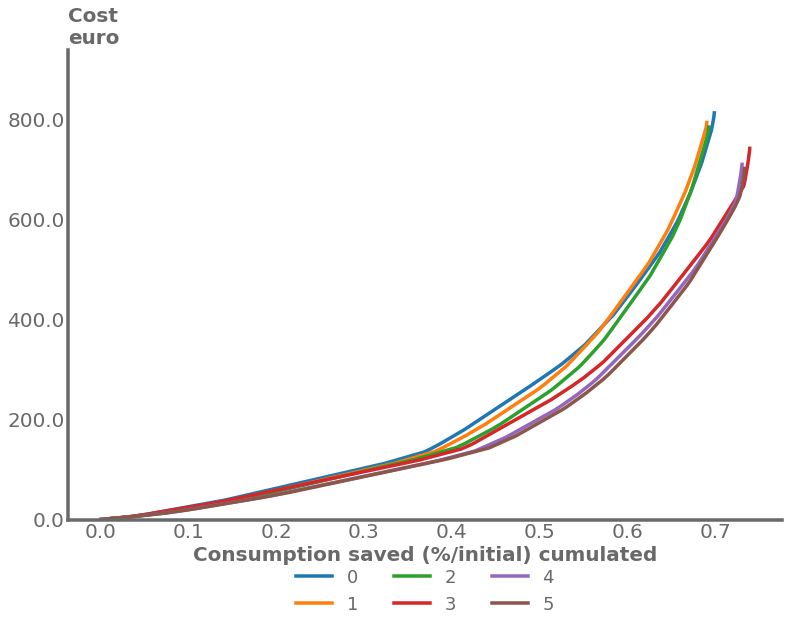

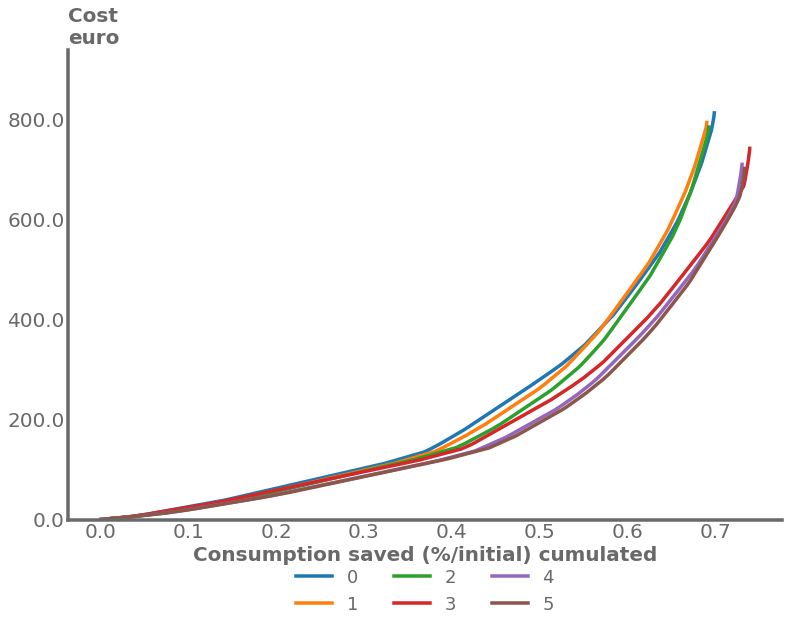

In [12]:
make_plots(data, y_label='Cost (euro)')